## **Analyzing "players"**

This dataset contains season-level team statistics for the WNBA. Each record represents a team’s performance in a given year, including identifiers such as league, team, and conference, as well as offensive and defensive stats. It also includes game outcomes like wins, losses, playoff results, and attendance information. This dataset can be used to analyze team performance trends, efficiency, and progression across seasons.


### **Introduction to the Dataset**

This section provides a brief analysis of the dataset, highlighting its key metrics and characteristics.

In [210]:
import sys
import os
sys.path.append('..')
import importlib
from data_scripts import _store_data as sd;
from data_scripts import players_data as psd;
from pathlib import Path
importlib.reload(psd)

sd.load_data(Path("../data"))
display(sd.df_info_table(sd.players_df))

,Non-Null Count,Null Count,Missing %,Dtype,Unique Values
bioID,809,0,0.00,object,809
pos,809,0,0.00,object,5
height,809,0,0.00,float64,20
weight,809,0,0.00,float64,104
college,719,90,11.12,object,159
collegeOther,11,798,98.64,object,11
birthDate,809,0,0.00,object,763
deathDate,809,0,0.00,object,5


As shown in the **table**, the dataset contains some **null values**, indicating that **data cleaning** and **preprocessing** are required. The dataset includes **personal information** for **$893$ players**, covering **$7$ different positions** and originating from **$160$ different colleges**.  

Upon reviewing the table, it is evident that although there are records for **$893$ players**, there are only **$764$ unique dates**. This **inconsistency** is unlikely in a **realistic and accurate dataset**, so the **discrepancy** will be **further analyzed**.


### **Cleaning**

#### Dropping Columns with Unique Values

In [211]:
del sd.players_df['firstseason']
del sd.players_df['lastseason']

KeyError: 'firstseason'

Since the `firstseason` and the `lastseason` columns contain only one unique value, they can be removed as it will not affect the analysis of the dataset.

#### Cleaning players without "pos"

The next step is to remove players without a recorded position, as it is not possible for a player to exist without one. Therefore, these entries will be deleted from the dataset.

In [ ]:
psd.clean_no_pos_players()
display(sd.df_info_table(sd.players_df))

,Non-Null Count,Null Count,Missing %,Dtype,Unique Values
bioID,815,0,0.00,object,815
pos,815,0,0.00,object,7
height,815,0,0.00,float64,21
weight,815,0,0.00,int64,105
college,725,90,11.04,object,160
collegeOther,11,804,98.65,object,11
birthDate,815,0,0.00,object,764
deathDate,815,0,0.00,object,5


It is possible to see that even though **$78$ rows** were removed from the dataset — leaving **$815$ players** on record — the number of **unique birth dates** has **not decreased**. This indicates that **no important data was lost**.  

However, the **birthDate** column still needs to be **analyzed further** to check for any **remaining errors**.


### **EDA**

#### Checking birthDate column

A scatter plot was used to examine the year component of the birthDate column, as it represents the most relevant aspect of a player’s date of birth. This visualization helps identify any potential outliers or inconsistencies in the data.

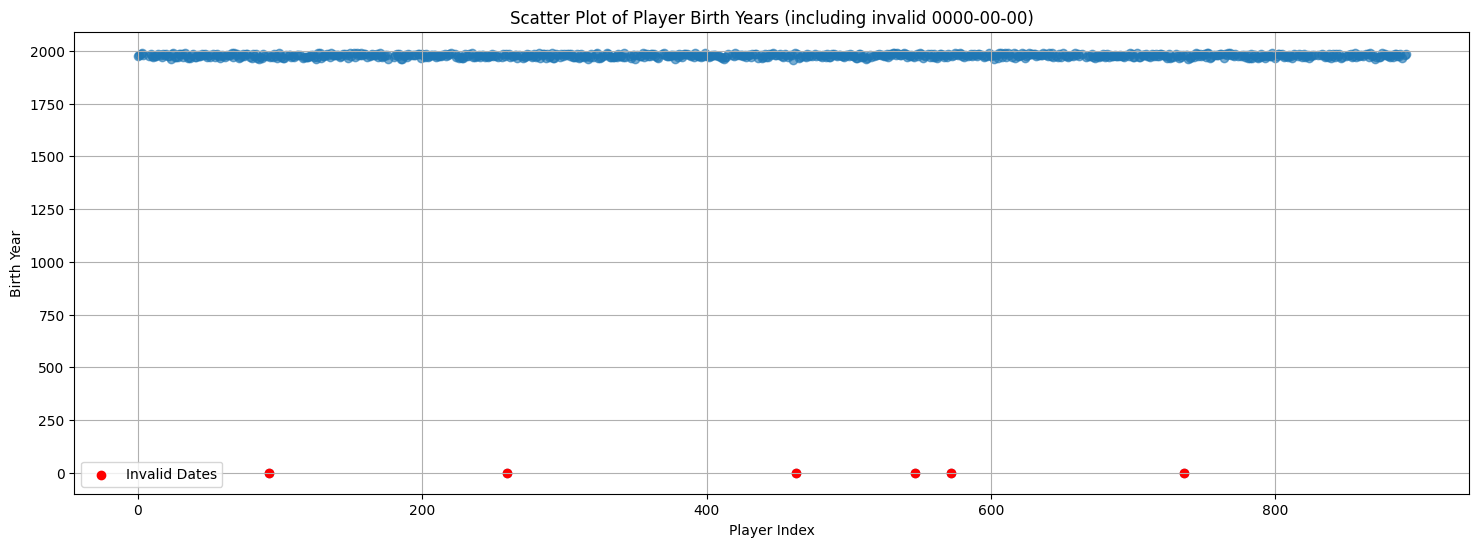

In [ ]:
psd.birthDate_check()

As shown in the **scatter plot**, some players have a **birthDate** recorded as **$0$**, which is **invalid**. Therefore, these **rows will be removed** from the dataset.


,Non-Null Count,Null Count,Missing %,Dtype,Unique Values
bioID,809,0,0.00,object,809
pos,809,0,0.00,object,7
height,809,0,0.00,float64,20
weight,809,0,0.00,int64,105
college,719,90,11.12,object,159
collegeOther,11,798,98.64,object,11
birthDate,809,0,0.00,object,763
deathDate,809,0,0.00,object,5


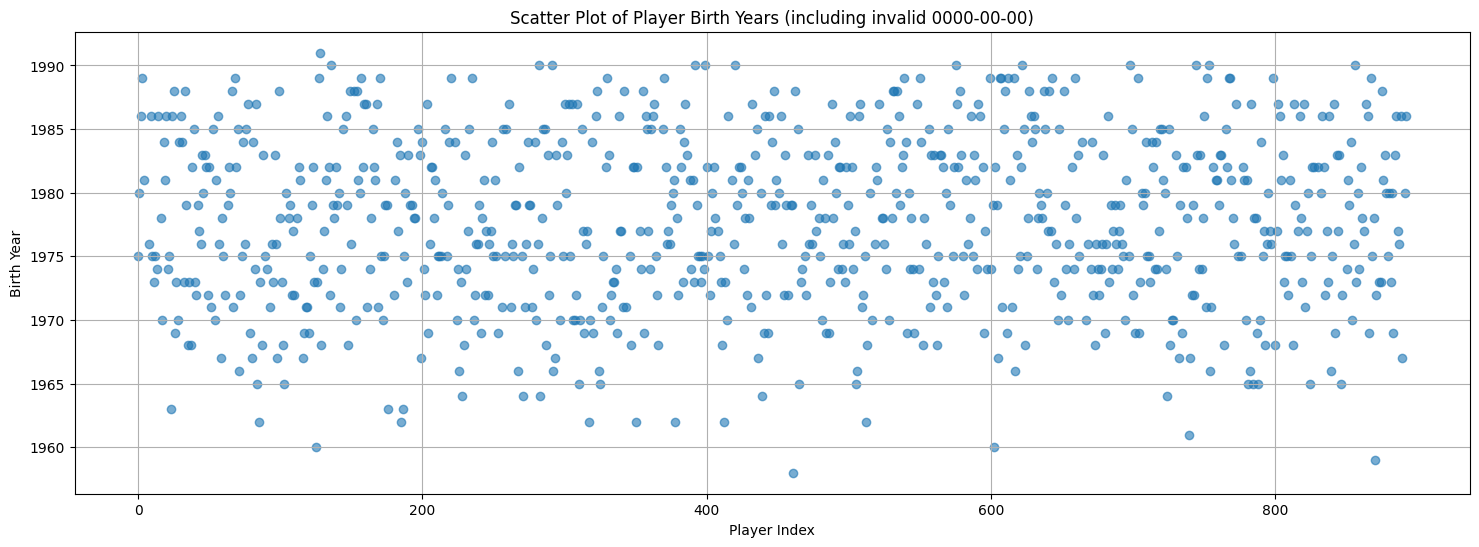

In [ ]:
psd.clean_no_bd_players()
display(sd.df_info_table(sd.players_df))
psd.birthDate_check()

The table and scatter plot now provide a much more realistic representation of the players’ birth dates recorded in the dataset.

#### College of Origin

Analyzing the players’ colleges of origin to determine whether certain colleges produce more WNBA players than others.

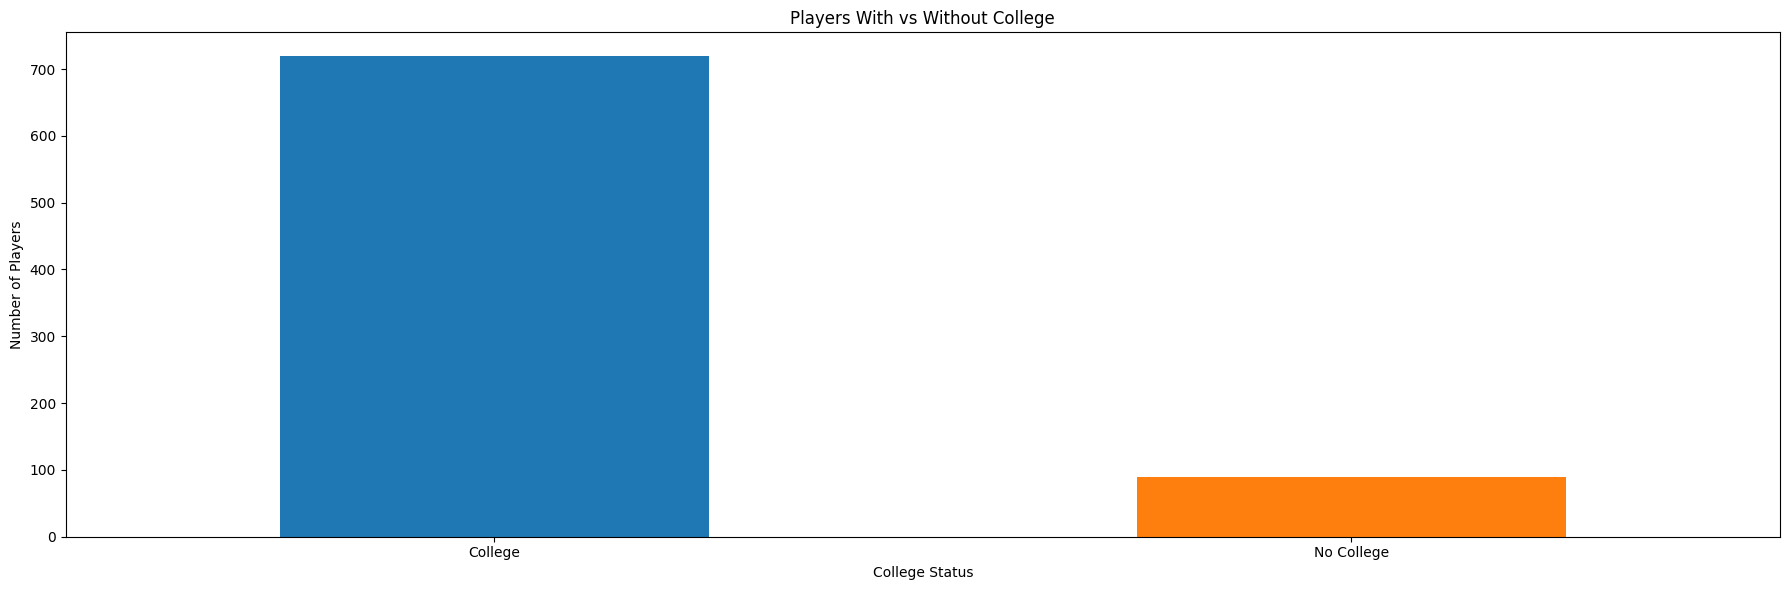

In [ ]:
psd.college_origin()

From this **bar plot**, it is possible to observe that **considerably more players** come from a **college background** than those who do not.  

This suggests that **playing college basketball** increases a player’s **chances of entering the WNBA**.


In [ ]:
display(psd.top_10_colleges_table())

,College,Number of Players
0,Tennessee,38
1,Stanford,29
2,Connecticut,26
3,Georgia,21
4,Louisiana Tech,17
5,North Carolina,16
6,Louisiana State,16
7,Texas,16
8,Duke,15
9,Maryland,14


From this **table**, it is evident that the colleges with the **greatest success** in producing **WNBA players** are the **University of Tennessee**, **Stanford University**, and the **University of Connecticut**.


#### Players Positions

The goal is to analyze whether certain positions have more players and to examine the correlation between a player’s position, height, and weight.

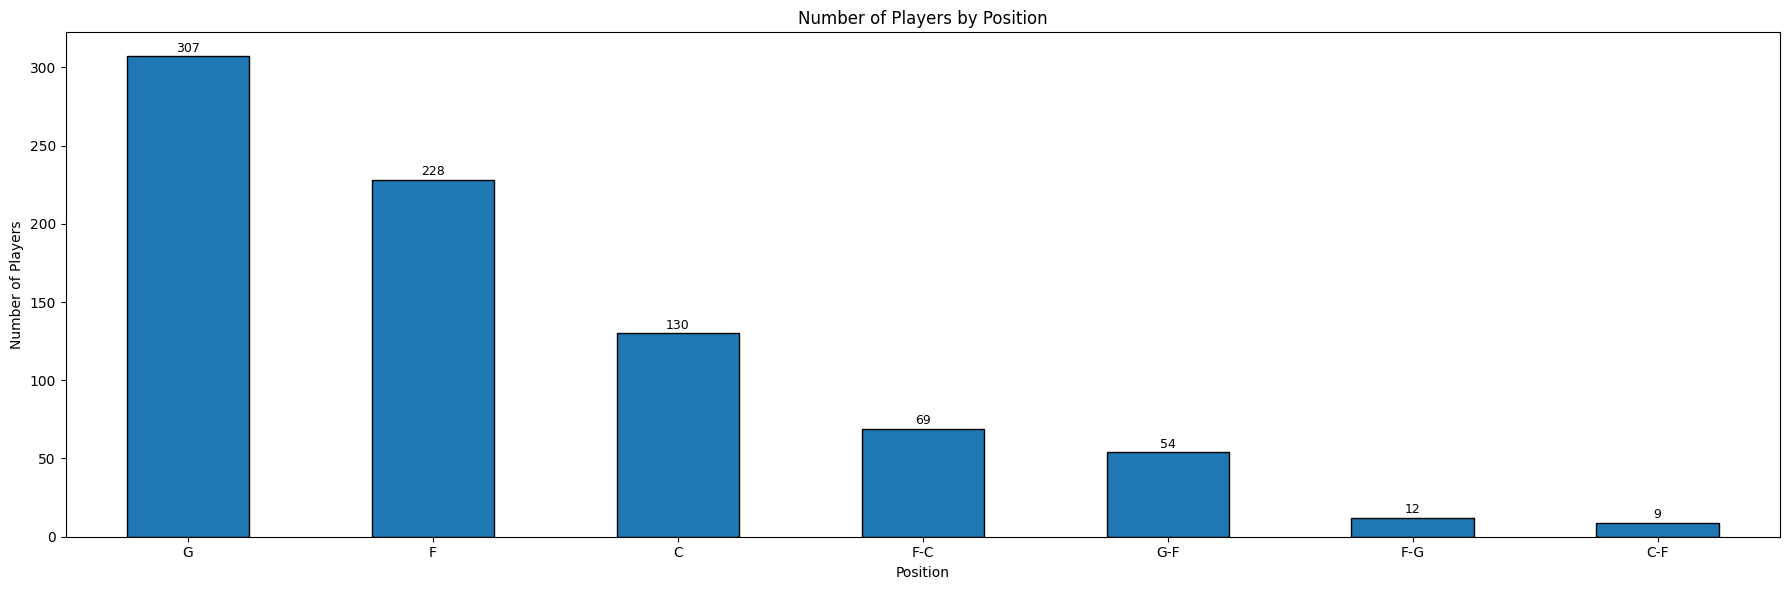

In [ ]:
psd.players_by_position()

The **graph** shows that most players are **guards ($309$)** and **forwards ($230$)**, with fewer **centers ($130$)**.  

**Hybrid positions** like **forward-center ($70$)**, **guard-forward ($55$)**, **forward-guard ($12$)**, and **center-forward ($9$)** are much less common.  

Overall, **traditional positions dominate**, while **hybrid roles** make up a **small, specialized minority**.


In [ ]:
psd.position_height_weight()

This **3D scatter plot** illustrates the relationship between **player position**, **height**, and **weight** in the **WNBA dataset**.  

Since there is outliers it is not easy to read the graph at the moment but we can see that players with a hifen on the position are a transition of the measures **height** and **weight** between their two letters.

With these informations and our knowledge about the WNBA we can assume that **F-G** and **G-F** are players that can play both **Guard** and **Forward**. The difference between the order of the positions **F** first or **G** first should come from the main position from the player, but since that information doens't contribute for nothing to us we will merge these type of situations and put the position that has an higher average in first.

In [ ]:
psd.position_merge()

When analyzing this **dataset**, special attention must be paid to **incorrect entries** for players’ **heights** and **weights**. Unlike other statistics — where values such as **$0$** or **$100$ points** can be realistic — having a player **weigh only $10$ pounds** or **stand $12$ inches tall** is **impossible**.  

Such **erroneous data** should therefore be **identified and cleaned**.

Since we don't want to have that type of outliers with impossible values we will proceed to replace them with the average value of the heaviest position the player can play. This ensures the value is realistic for the player and doesn’t overcomplicate things. It also avoids using averages from players with multiple positions, which can be a small sample and may not represent the data properly.

In [212]:
psd.normalize_players()
psd.position_height_weight()

After **normalization**, the **averages** appear much more **realistic**. Although some small **outliers** remain, they represent values that are still **plausible** for a **WNBA player**. 

With all the data clear now the visualization of this graph reveals **distinct positional clustering** with **minimal overlap** between position classes:  
- **Centers (C)** occupy the **upper range** (*$72$–$80$ inches*, *$160$–$230+$ lbs*),  
- **Forwards (F)** form a **middle tier** (*$69$–$77$ inches*, *$135$–$220$ lbs*), and  
- **Guards (G)** cluster at the **lower end** (*$62$–$76$ inches*, *$115$–$190$ lbs*) with the **greatest dispersion**.  

**Hybrid positions** — **CF**, **FG** — demonstrate **transitional characteristics** that **bridge their parent positions**.  

The **strong positive correlation** between **height** and **weight** within each cluster, combined with the **clear vertical stratification by position**, indicates these **anthropometric features** will serve as **highly discriminative predictors** in our **position classification model**.

### **EDA Conclusions**

The **WNBA dataset** shows that the **average player** is approximately **$73$ inches tall** and **weighs around $165$ pounds**, with some **plausible outliers**. **Height** and **weight** are **strongly correlated** and vary distinctly by **position**, making them **valuable features** for **predictive modeling**.  

Most players come from a **college basketball background**, with the **University of Tennessee**, **Stanford University**, and the **University of Connecticut** producing the most **WNBA athletes**, highlighting the **importance of college experience** in reaching the league.  

**Traditional positions dominate** the league, with **guards ($309$)** and **forwards ($230$)** outnumbering **centers ($130$)**, while **hybrid positions** are **relatively rare**. **Positional clustering** is clear: **centers** occupy the **tallest and heaviest range**, **forwards** sit in the **middle**, and **guards** are generally **shorter and lighter** with more variation.  

**Hybrid positions** exhibit **transitional traits**, **bridging parent roles**.  

Overall, **height**, **weight**, and **positional distinctions** provide **strong predictive potential** for **player classification**.


In [ ]:
sd.save_data(Path("../data"))